In [2]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 모델의 최적의 하이퍼 파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 학습 모델 저장을 위한 라이브러리
import pickle

# 결측치 시각화를 위한 라이브러리
import missingno

In [4]:
# 병합한 마케팅정보 파일을 불러온다.
df1 = pd.read_csv('open/train/2018_train_마케팅정보_segment병합.csv')
df1

,기준년월,ID,컨택건수_카드론_TM_B0M,컨택건수_리볼빙_TM_B0M,컨택건수_CA_TM_B0M,컨택건수_이용유도_TM_B0M,컨택건수_신용발급_TM_B0M,컨택건수_부대서비스_TM_B0M,컨택건수_포인트소진_TM_B0M,컨택건수_보험_TM_B0M,...,컨택건수_CA_당사앱_R6M,컨택건수_리볼빙_당사앱_R6M,컨택건수_이용유도_당사앱_R6M,컨택건수_채권_B0M,컨택건수_FDS_B0M,컨택건수_채권_R6M,컨택건수_FDS_R6M,캠페인접촉건수_R12M,캠페인접촉일수_R12M,Segment
0,201807,TRAIN_000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1회 이상,1일 이상,D
1,201807,TRAIN_000001,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,15회 이상,10일 이상,E
2,201807,TRAIN_000002,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1회 이상,1일 이상,C
3,201807,TRAIN_000003,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1회 이상,1일 이상,D
4,201807,TRAIN_000004,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1회 이상,1일 이상,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399995,201812,TRAIN_399995,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1회 이상,1일 이상,E
2399996,201812,TRAIN_399996,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,20회 이상,15일 이상,D
2399997,201812,TRAIN_399997,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1회 이상,1일 이상,C
2399998,201812,TRAIN_399998,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1회 이상,1일 이상,E


### 기준년월, Segment별 고객 수

In [283]:
# 기준년월, Segment별 고객 수
monthly_segment_customer_count = (
    df1.groupby(["기준년월", "Segment"])["ID"]
    .nunique()  # 고객 수 세기
    .unstack(fill_value=0)
)

display(monthly_segment_customer_count)

Segment,A,B,C,D,E
기준년월,,,,,
201807,162,24,21265,58207,320342
201808,162,24,21265,58207,320342
201809,162,24,21265,58207,320342
201810,162,24,21265,58207,320342
201811,162,24,21265,58207,320342
201812,162,24,21265,58207,320342


### 컨택건수_이용유도

In [48]:
pd.options.display.float_format = '{:.5f}'.format
# 1. 분석 대상 컬럼 리스트
use_contact_cols = [
    "컨택건수_이용유도_EM_B0M", "컨택건수_이용유도_EM_R6M",
    "컨택건수_이용유도_LMS_B0M", "컨택건수_이용유도_LMS_R6M",
    "컨택건수_이용유도_TM_B0M", "컨택건수_이용유도_TM_R6M",
    "컨택건수_이용유도_당사앱_B0M", "컨택건수_이용유도_당사앱_R6M",
    "컨택건수_이용유도_인터넷_B0M", "컨택건수_이용유도_인터넷_R6M",
    "컨택건수_이용유도_청구서_B0M", "컨택건수_이용유도_청구서_R6M"
]
# 데이터 타입 확인
df1[use_contact_cols].info()

# 2. Segment A~E 필터링
df1_seg = df1[df1["Segment"].isin(["A", "B", "C", "D", "E"])]

# 3. 평균값 계산 (전치 포함)
use_mean = df1_seg.groupby("Segment")[use_contact_cols].mean().T

# B0M, R6M으로 나누기
use_mean_B0M = use_mean[use_mean.index.str.contains("_B0M")]
use_mean_R6M = use_mean[use_mean.index.str.contains("_R6M")]

# 결과 출력
display(use_mean_B0M)
display(use_mean_R6M)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400000 entries, 0 to 2399999
Data columns (total 12 columns):
 #   Column             Dtype
---  ------             -----
 0   컨택건수_이용유도_EM_B0M   int64
 1   컨택건수_이용유도_EM_R6M   int64
 2   컨택건수_이용유도_LMS_B0M  int64
 3   컨택건수_이용유도_LMS_R6M  int64
 4   컨택건수_이용유도_TM_B0M   int64
 5   컨택건수_이용유도_TM_R6M   int64
 6   컨택건수_이용유도_당사앱_B0M  int64
 7   컨택건수_이용유도_당사앱_R6M  int64
 8   컨택건수_이용유도_인터넷_B0M  int64
 9   컨택건수_이용유도_인터넷_R6M  int64
 10  컨택건수_이용유도_청구서_B0M  int64
 11  컨택건수_이용유도_청구서_R6M  int64
dtypes: int64(12)
memory usage: 219.7 MB


Segment,A,B,C,D,E
컨택건수_이용유도_EM_B0M,2.78807,4.59028,2.88577,3.01461,1.54968
컨택건수_이용유도_LMS_B0M,0.88683,1.29167,0.74926,0.72863,0.63168
컨택건수_이용유도_TM_B0M,0.00000,0.00000,0.00366,0.00973,0.09689
컨택건수_이용유도_당사앱_B0M,0.00000,0.00000,0.00015,0.00006,0.00001
컨택건수_이용유도_인터넷_B0M,0.21091,0.12500,0.17690,0.19419,0.19942
컨택건수_이용유도_청구서_B0M,0.61317,0.63194,0.42782,0.39061,0.29689


Segment,A,B,C,D,E
컨택건수_이용유도_EM_R6M,17.16461,26.28472,17.88468,18.49703,11.10477
컨택건수_이용유도_LMS_R6M,3.84877,5.71528,3.70951,3.66269,3.48899
컨택건수_이용유도_TM_R6M,0.20370,0.54167,0.39955,0.58175,1.29163
컨택건수_이용유도_당사앱_R6M,0.00000,0.00000,0.00213,0.00134,0.00049
컨택건수_이용유도_인터넷_R6M,2.03086,1.53472,1.95547,2.16691,2.42137
컨택건수_이용유도_청구서_R6M,2.43416,2.16667,1.91624,2.03353,1.80492


### 개별확인용

In [261]:
df1['컨택건수_이용유도_청구서_R6M'].value_counts().sort_index()

컨택건수_이용유도_청구서_R6M
0     1161176
1      240602
2      182333
3       73609
4      370487
5      282743
6       53500
7          82
8        1783
9          97
10       4699
11      25610
12       3279
Name: count, dtype: int64

In [263]:
# 세그먼트별 '컨택건수_이용유도_EM_B0M' 값 분포 확인
tm_contact_dist = (
    df1.groupby("Segment")["컨택건수_이용유도_청구서_R6M"]
    .value_counts()
    .sort_index()  # 값 기준 정렬
    .unstack(fill_value=0)  # 보기 좋게 pivot
)

# 결과 출력
display(tm_contact_dist)

# Segment별 비율 테이블 (열 기준 normalize)
tm_contact_ratio = tm_contact_dist.div(tm_contact_dist.sum(axis=1), axis=0)
display(tm_contact_ratio)

컨택건수_이용유도_청구서_R6M,0,1,2,3,4,5,6,7,8,9,10,11,12
Segment,,,,,,,,,,,,,
A,499,96,78,16,110,24,14,0,15,0,24,90,6
B,86,12,8,0,13,4,1,0,3,0,5,12,0
C,70752,9479,8673,3023,16469,8517,2872,5,627,5,1422,5362,384
D,164312,34480,30993,10919,49610,36414,9076,11,516,13,1619,9855,1424
E,925527,196535,142581,59651,304285,237784,41537,66,622,79,1629,10291,1465


컨택건수_이용유도_청구서_R6M,0,1,2,3,4,5,6,7,8,9,10,11,12
Segment,,,,,,,,,,,,,
A,0.51337,0.09877,0.08025,0.01646,0.11317,0.02469,0.01440,0.00000,0.01543,0.00000,0.02469,0.09259,0.00617
B,0.59722,0.08333,0.05556,0.00000,0.09028,0.02778,0.00694,0.00000,0.02083,0.00000,0.03472,0.08333,0.00000
C,0.55453,0.07429,0.06798,0.02369,0.12908,0.06675,0.02251,0.00004,0.00491,0.00004,0.01115,0.04203,0.00301
D,0.47048,0.09873,0.08874,0.03126,0.14205,0.10427,0.02599,0.00003,0.00148,0.00004,0.00464,0.02822,0.00408
E,0.48153,0.10225,0.07418,0.03104,0.15831,0.12371,0.02161,0.00003,0.00032,0.00004,0.00085,0.00535,0.00076


### 청구서 채녈을 통한 마케팅유도
| Segment | 특징 요약                                        |
| ------- | -------------------------------------------- |
| A, B    | 2회 비율이 1회보다 높음 → 청구서 채널 **지속적 컨택 경험** 있음     |
| C       | 1회 중심, 2회로 이어지는 비율 감소 → **일시적 반응** 가능성       |
| D       | 1회 반응이 가장 높음 (27.9%) → **단발성 반응성** 가능        |
| E       | 0회 압도적(71.4%) + 2회 거의 없음 → **채널 비노출 또는 비선호** |


### 청구서 채녈을 통한 마케팅유도 6개월
| Segment | 0회 비율     | 1\~2회 비율 | 3회 이상 비율   | 특징 요약                           |
| ------- | --------- | -------- | ---------- | ------------------------------- |
| A       | 51.3%     | 18.0%    | 30.6%      | 1/2회, 다회 모두 고르게 분포된 중간 그룹       |
| B       | **59.7%** | 13.9%    | **26.4%↓** | 청구서 채널 반응도 가장 낮은 그룹             |
| C       | 55.5%     | 14.2%    | 30.3%↑     | 중상 수준, 반복 접촉 가능성 보임             |
| D       | 47.0%     | 18.8%    | **34.2%↑** | **청구서 채널 반응성 가장 우수**            |
| E       | 48.1%     | 17.6%    | 34.3%↑     | D와 유사, **청구서 기반 고객 활성화 가능성 높음** |


### 인터넷 채널을 통한 마케팅유도 6개월
| 구분 | 주요 특징        | 마케팅 전략 제안          |
| -- | ------------ | ------------------ |
| A  | 중간 수준의 접점 유지 | 기존 채널 유지, 추가 실험    |
| B  | 절반 이상 비접촉    | **TM, 오프라인 우선 고려** |
| C  | 고른 인터넷 접점 분포 | 디지털 마케팅 유효         |
| D  | 디지털 활용도 높음   | **인터넷 채널 집중 공략**   |
| E  | 압도적 디지털 접점   | **우선 타겟 마케팅 대상**   |


In [220]:
# # 조건에 맞는 데이터 필터링
# filtered_df = df1[(df1["Segment"] == "B") & (df1["컨택건수_이용유도_인터넷_B0M"] == 13)]

# # 결과 확인 (원하면 필요한 컬럼만 선택해도 됨)
# display(filtered_df)


,기준년월,ID,컨택건수_카드론_TM_B0M,컨택건수_리볼빙_TM_B0M,컨택건수_CA_TM_B0M,컨택건수_이용유도_TM_B0M,컨택건수_신용발급_TM_B0M,컨택건수_부대서비스_TM_B0M,컨택건수_포인트소진_TM_B0M,컨택건수_보험_TM_B0M,...,컨택건수_CA_당사앱_R6M,컨택건수_리볼빙_당사앱_R6M,컨택건수_이용유도_당사앱_R6M,컨택건수_채권_B0M,컨택건수_FDS_B0M,컨택건수_채권_R6M,컨택건수_FDS_R6M,캠페인접촉건수_R12M,캠페인접촉일수_R12M,Segment


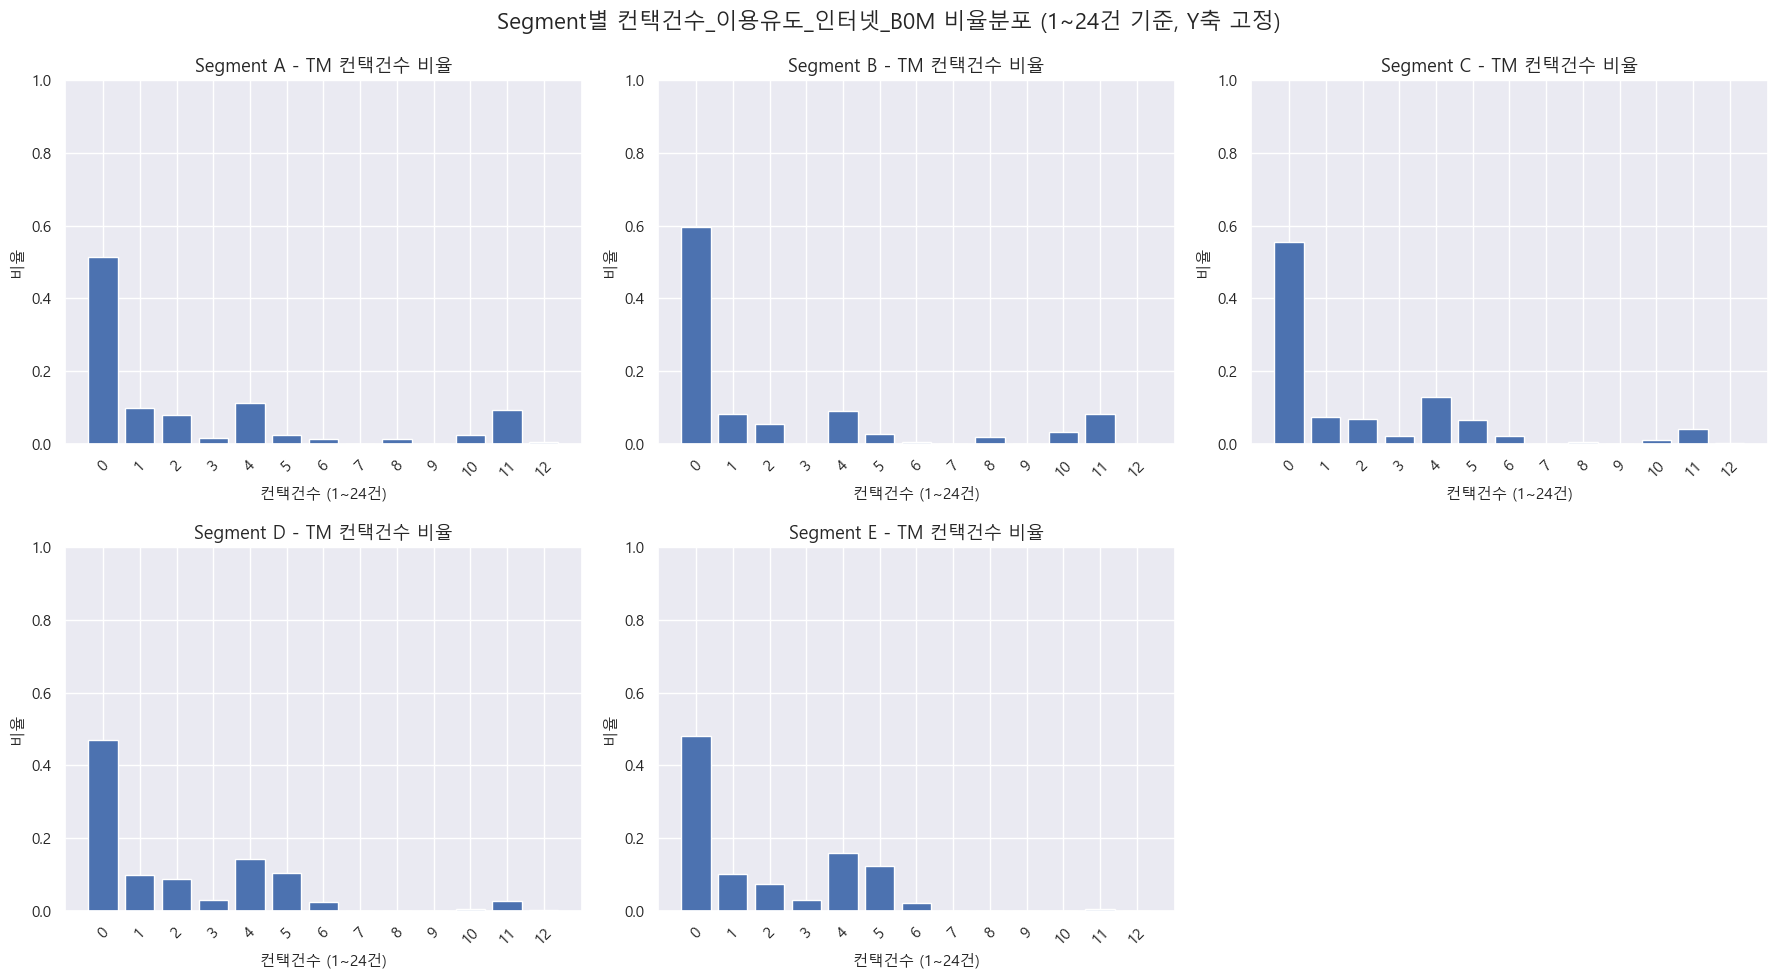

In [265]:
# 컬럼 범위설정
tm_contact_ratio_range = tm_contact_ratio.loc[:, 0:16]

# 막대그래프 시각화
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

segments = tm_contact_ratio_range.index.tolist()

for i, seg in enumerate(segments):
    axes[i].bar(tm_contact_ratio_range.columns.astype(str), tm_contact_ratio_range.loc[seg])
    axes[i].set_title(f"Segment {seg} - TM 컨택건수 비율", fontsize=13)
    axes[i].set_xlabel("컨택건수 (1~24건)", fontsize=11)
    axes[i].set_ylabel("비율", fontsize=11)
    axes[i].set_ylim(0, 1)  # Y축 고정
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(True, axis='y')

# 빈 subplot 제거 (6번째)
fig.delaxes(axes[-1])

# 전체 타이틀
fig.suptitle("Segment별 컨택건수_이용유도_인터넷_B0M 비율분포 (1~24건 기준, Y축 고정)", fontsize=16)
plt.tight_layout()
plt.show()


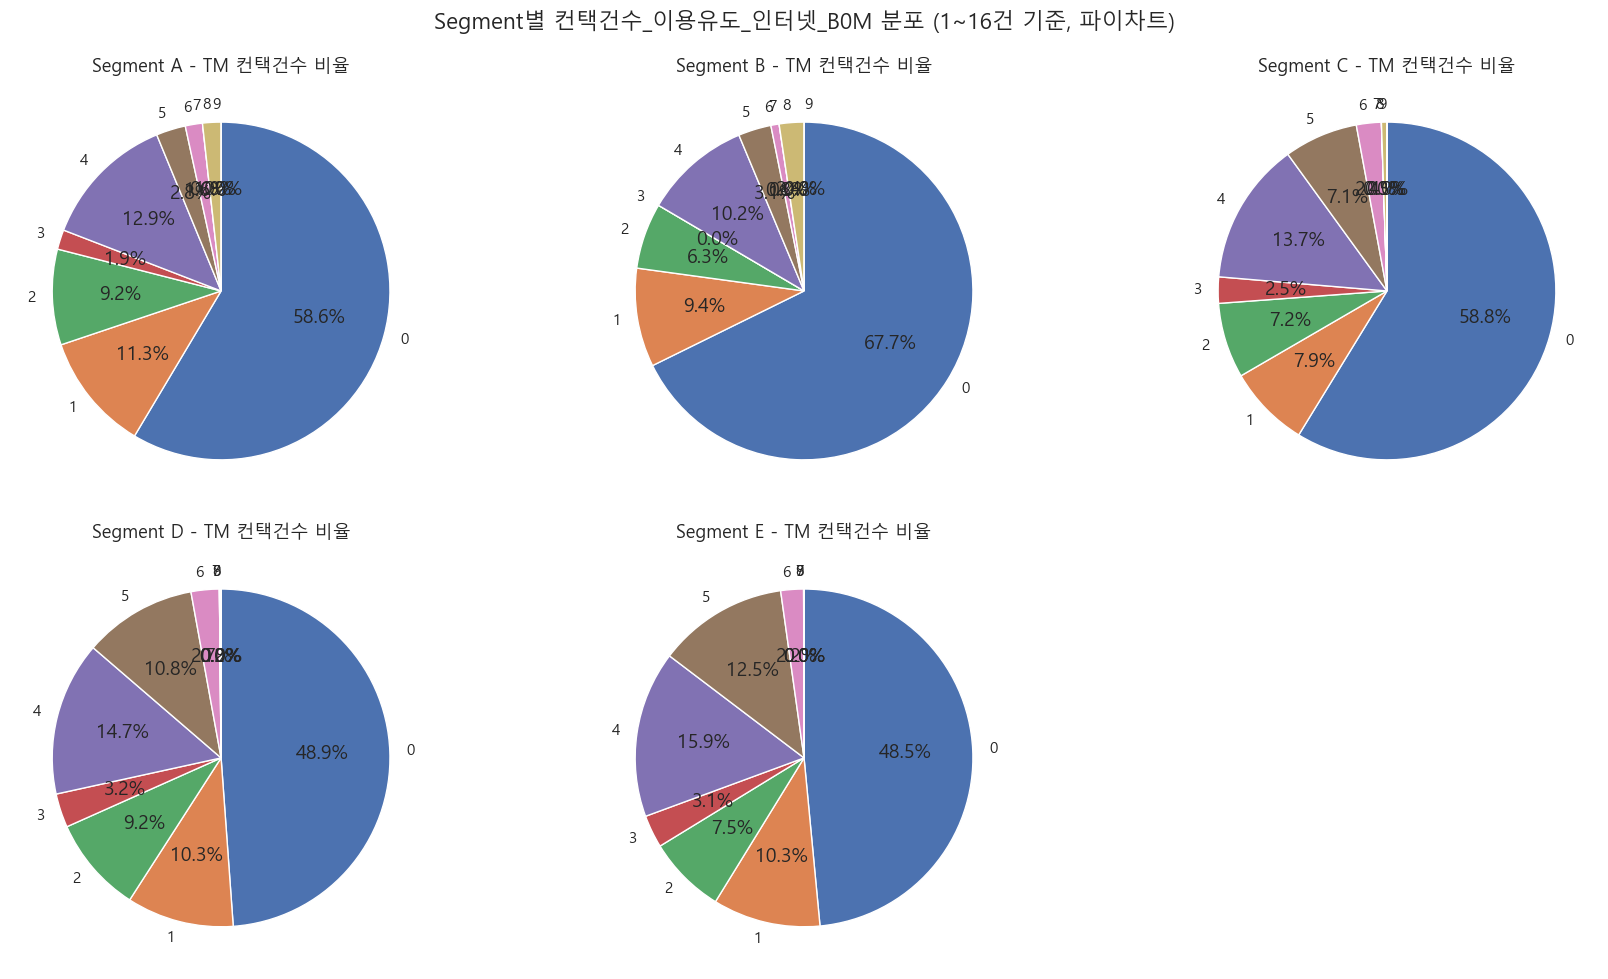

In [266]:
# 0건 제외한 1~16건 컬럼만 추출
tm_contact_ratio_range = tm_contact_ratio.loc[:, 0:9]

# 파이차트 시각화
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

segments = tm_contact_ratio_range.index.tolist()

for i, seg in enumerate(segments):
    data = tm_contact_ratio_range.loc[seg]
    axes[i].pie(
        data,
        labels=data.index.astype(str),
        autopct='%1.1f%%',
        startangle=90,
        counterclock=False
    )
    axes[i].set_title(f"Segment {seg} - TM 컨택건수 비율", fontsize=13)

# 빈 subplot 제거 (6번째)
fig.delaxes(axes[-1])

# 전체 타이틀
fig.suptitle("Segment별 컨택건수_이용유도_인터넷_B0M 분포 (1~16건 기준, 파이차트)", fontsize=16)
plt.tight_layout()
plt.show()


### 컨택건수_채권

In [53]:
pd.options.display.float_format = '{:.5f}'.format
# 1. 분석 대상 컬럼 지정
bond_columns = [
    "컨택건수_채권_B0M",
    "컨택건수_채권_R6M"
]

# 데이터 타입 확인
df1[bond_columns].info()

# 2. Segment 필터링 (A~E)
df1_seg = df1[df1["Segment"].isin(["A", "B", "C", "D", "E"])]

# 3. 평균값 계산
bond_mean = df1_seg.groupby("Segment")[bond_columns].mean().T

# 4. 결과 출력
display(bond_mean)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400000 entries, 0 to 2399999
Data columns (total 2 columns):
 #   Column       Dtype
---  ------       -----
 0   컨택건수_채권_B0M  int64
 1   컨택건수_채권_R6M  int64
dtypes: int64(2)
memory usage: 36.6 MB


Segment,A,B,C,D,E
컨택건수_채권_B0M,0.00514,0.00000,0.03152,0.03506,0.02581
컨택건수_채권_R6M,0.31687,0.37500,0.51546,0.54497,0.40121


### 개별확인용

In [273]:
# 세그먼트별 '컨택건수_채권_B0M' 값 분포 확인
tm_contact_dist = (
    df1.groupby("Segment")["컨택건수_채권_R6M"]
    .value_counts()
    .sort_index()  # 값 기준 정렬
    .unstack(fill_value=0)  # 보기 좋게 pivot
)

# 결과 출력
display(tm_contact_dist)

# Segment별 비율 테이블 (열 기준 normalize)
tm_contact_ratio = tm_contact_dist.div(tm_contact_dist.sum(axis=1), axis=0)
display(tm_contact_ratio)

컨택건수_채권_R6M,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
Segment,,,,,,,,,,,,,,,,,,,,,
A,904,0,1,11,24,20,9,1,2,0,...,0,0,0,0,0,0,0,0,0,0
B,134,0,0,0,2,2,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C,118332,2,46,479,2131,2542,1572,669,302,178,...,18,17,5,3,6,7,2,4,0,0
D,324548,7,79,996,4759,6160,4305,2060,1093,682,...,91,50,17,13,8,7,2,6,1,0
E,1820972,9,192,2771,15239,24011,19603,11360,6201,3823,...,338,99,70,43,36,37,18,9,7,2


컨택건수_채권_R6M,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
Segment,,,,,,,,,,,,,,,,,,,,,
A,0.93004,0.00000,0.00103,0.01132,0.02469,0.02058,0.00926,0.00103,0.00206,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
B,0.93056,0.00000,0.00000,0.00000,0.01389,0.01389,0.04167,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
C,0.92744,0.00002,0.00036,0.00375,0.01670,0.01992,0.01232,0.00524,0.00237,0.00140,...,0.00014,0.00013,0.00004,0.00002,0.00005,0.00005,0.00002,0.00003,0.00000,0.00000
D,0.92929,0.00002,0.00023,0.00285,0.01363,0.01764,0.01233,0.00590,0.00313,0.00195,...,0.00026,0.00014,0.00005,0.00004,0.00002,0.00002,0.00001,0.00002,0.00000,0.00000
E,0.94741,0.00000,0.00010,0.00144,0.00793,0.01249,0.01020,0.00591,0.00323,0.00199,...,0.00018,0.00005,0.00004,0.00002,0.00002,0.00002,0.00001,0.00000,0.00000,0.00000


### 상관관계를 한번보자

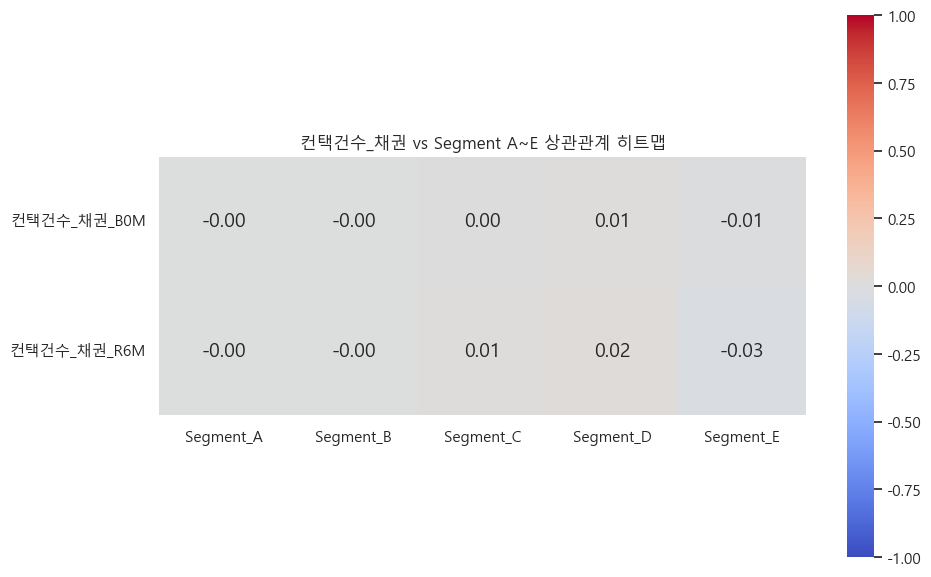

In [286]:
# 컨택건수_채권 관련 수치형 컬럼 리스트
bond_columns = [
    "컨택건수_채권_B0M",
    "컨택건수_채권_R6M"
]

# Segment를 원-핫 인코딩
segment_dummies = pd.get_dummies(df1["Segment"], prefix="Segment")

# 인코딩된 세그먼트와 홈페이지 컬럼만 추출
df_encoded = pd.concat([df1[bond_columns], segment_dummies], axis=1)

# 상관관계 계산
corr_matrix = df_encoded.corr()

# 히트맵 시각화 (홈페이지 컬럼 vs Segment 컬럼만 표시)
plt.figure(figsize=(10, 6))
sns.heatmap(
    corr_matrix.loc[bond_columns, segment_dummies.columns],
    annot=True, cmap="coolwarm", fmt=".2f", square=True, vmax=1, vmin=-1
)
plt.title("컨택건수_채권 vs Segment A~E 상관관계 히트맵")
plt.tight_layout()
plt.show()

In [275]:
# 월에 따른 값
# Segment + 기준년월 기준으로 그룹화하여 value_counts
tm_contact_dist = (
    df1.groupby(["Segment", "기준년월"])["컨택건수_채권_R6M"]
    .value_counts()
    .sort_index()
    .unstack(fill_value=0)
)

# 결과 확인 (절대값)
display(tm_contact_dist)

# 비율 테이블 (행 기준 normalize)
tm_contact_ratio = tm_contact_dist.div(tm_contact_dist.sum(axis=1), axis=0)
display(tm_contact_ratio)

컨택건수_채권_R6M         0   1   2    3     4     5     6     7     8    9   ...  \
Segment 기준년월                                                            ...   
A       201807     149   0   0    1     6     5     1     0     0    0  ...   
        201808     147   0   0    3     5     4     2     0     1    0  ...   
        201809     148   0   0    2     5     3     3     1     0    0  ...   
        201810     149   0   0    4     2     6     0     0     1    0  ...   
        201811     150   0   1    1     6     1     3     0     0    0  ...   
        201812     161   0   0    0     0     1     0     0     0    0  ...   
B       201807      22   0   0    0     1     0     1     0     0    0  ...   
        201808      22   0   0    0     0     0     2     0     0    0  ...   
        201809      22   0   0    0     1     1     0     0     0    0  ...   
        201810      22   0   0    0     0     1     1     0     0    0  ...   
        201811      22   0   0    0     0     0     2     0     0    0  ...   
        201812      24   0   0    0     0     0     0     0     0    0  ...   
C       201807   19326   0   0   47   453   658   335   119    48   33  ...   
        201808   19392   1  12  105   466   500   317   124    62   35  ...   
        201809   19485   0   6  112   441   483   275   144    51   28  ...   
        201810   19527   0  10  105   401   448   311   125    72   36  ...   
        201811   19568   1  18  110   362   414   318   154    69   44  ...   
        201812   21034   0   0    0     8    39    16     3     0    2  ...   
D       201807   53170   0   0   78   996  1476   929   390   210  117  ...   
        201808   53262   1  18  225  1008  1272   834   390   224  128  ...   
        201809   53473   1   6  225  1029  1137   817   385   190  132  ...   
        201810   53569   1  22  240   892  1059   823   430   243  148  ...   
        201811   53643   4  33  228   812  1071   840   454   225  143  ...   
        201812   57431   0   0    0    22   145    62    11     1   14  ...   
E       201807  298705   0   2  228  3296  6098  4749  2256  1109  685  ...   
        201808  299731   2  52  599  3418  4981  4050  2208  1189  754  ...   
        201809  301043   2  35  638  3132  4535  3671  2150  1225  764  ...   
        201810  301830   2  42  613  2723  3981  3610  2382  1271  831  ...   
        201811  302472   3  61  693  2627  3690  3293  2328  1399  762  ...   
        201812  317191   0   0    0    43   726   230    36     8   27  ...   

컨택건수_채권_R6M      30  31  32  33  34  35  36  37  38  39  
Segment 기준년월                                             
A       201807    0   0   0   0   0   0   0   0   0   0  
        201808    0   0   0   0   0   0   0   0   0   0  
        201809    0   0   0   0   0   0   0   0   0   0  
        201810    0   0   0   0   0   0   0   0   0   0  
        201811    0   0   0   0   0   0   0   0   0   0  
        201812    0   0   0   0   0   0   0   0   0   0  
B       201807    0   0   0   0   0   0   0   0   0   0  
        201808    0   0   0   0   0   0   0   0   0   0  
        201809    0   0   0   0   0   0   0   0   0   0  
        201810    0   0   0   0   0   0   0   0   0   0  
        201811    0   0   0   0   0   0   0   0   0   0  
        201812    0   0   0   0   0   0   0   0   0   0  
C       201807    5   5   1   0   0   0   0   0   0   0  
        201808    2   1   0   0   0   0   0   0   0   0  
        201809    1   0   0   0   0   0   0   0   0   0  
        201810    1   0   0   0   0   0   0   0   0   0  
        201811    0   0   0   0   0   0   0   0   0   0  
        201812    9  11   4   3   6   7   2   4   0   0  
D       201807   35  11   0   0   0   0   0   0   0   0  
        201808   10   8   0   0   0   0   0   0   0   0  
        201809    1   0   0   0   0   0   0   0   0   0  
        201810    1   0   0   0   0   0   0   0   0   0  
        201811    0   1   0   0   0   0   0   0   0   0  
        201812   44  

컨택건수_채권_R6M         0       1       2       3       4       5       6   \
Segment 기준년월                                                             
A       201807 0.91975 0.00000 0.00000 0.00617 0.03704 0.03086 0.00617   
        201808 0.90741 0.00000 0.00000 0.01852 0.03086 0.02469 0.01235   
        201809 0.91358 0.00000 0.00000 0.01235 0.03086 0.01852 0.01852   
        201810 0.91975 0.00000 0.00000 0.02469 0.01235 0.03704 0.00000   
        201811 0.92593 0.00000 0.00617 0.00617 0.03704 0.00617 0.01852   
        201812 0.99383 0.00000 0.00000 0.00000 0.00000 0.00617 0.00000   
B       201807 0.91667 0.00000 0.00000 0.00000 0.04167 0.00000 0.04167   
        201808 0.91667 0.00000 0.00000 0.00000 0.00000 0.00000 0.08333   
        201809 0.91667 0.00000 0.00000 0.00000 0.04167 0.04167 0.00000   
        201810 0.91667 0.00000 0.00000 0.00000 0.00000 0.04167 0.04167   
        201811 0.91667 0.00000 0.00000 0.00000 0.00000 0.00000 0.08333   
        201812 1.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000   
C       201807 0.90882 0.00000 0.00000 0.00221 0.02130 0.03094 0.01575   
        201808 0.91192 0.00005 0.00056 0.00494 0.02191 0.02351 0.01491   
        201809 0.91629 0.00000 0.00028 0.00527 0.02074 0.02271 0.01293   
        201810 0.91827 0.00000 0.00047 0.00494 0.01886 0.02107 0.01462   
        201811 0.92020 0.00005 0.00085 0.00517 0.01702 0.01947 0.01495   
        201812 0.98914 0.00000 0.00000 0.00000 0.00038 0.00183 0.00075   
D       201807 0.91346 0.00000 0.00000 0.00134 0.01711 0.02536 0.01596   
        201808 0.91504 0.00002 0.00031 0.00387 0.01732 0.02185 0.01433   
        201809 0.91867 0.00002 0.00010 0.00387 0.01768 0.01953 0.01404   
        201810 0.92032 0.00002 0.00038 0.00412 0.01532 0.01819 0.01414   
        201811 0.92159 0.00007 0.00057 0.00392 0.01395 0.01840 0.01443   
        201812 0.98667 0.00000 0.00000 0.00000 0.00038 0.00249 0.00107   
E       201807 0.93246 0.00000 0.00001 0.00071 0.01029 0.01904 0.01482   
        201808 0.93566 0.00001 0.00016 0.00187 0.01067 0.01555 0.01264   
        201809 0.93976 0.00001 0.00011 0.00199 0.00978 0.01416 0.01146   
        201810 0.94221 0.00001 0.00013 0.00191 0.00850 0.01243 0.01127   
        201811 0.94422 0.00001 0.00019 0.00216 0.00820 0.01152 0.01028   
        201812 0.99016 0.00000 0.00000 0.00000 0.00013 0.00227 0.00072   

컨택건수_채권_R6M         7       8       9   ...      30      31      32      33  \
Segment 기준년월                            ...                                   
A       201807 0.00000 0.00000 0.00000  ... 0.00000 0.00000 0.00000 0.00000   
        201808 0.00000 0.00617 0.00000  ... 0.00000 0.00000 0.00000 0.00000   
        201809 0.00617 0.00000 0.00000  ... 0.00000 0.00000 0.00000 0.00000   
        201810 0.00000 0.00617 0.00000  ... 0.00000 0.00000 0.00000 0.00000   
        201811 0.00000 0.00000 0.00000  ... 0.00000 0.00000 0.00000 0.00000   
        201812 0.00000 0.00000 0.00000  ... 0.00000 0.00000 0.00000 0.00000   
B       201807 0.00000 0.00000 0.00000  ... 0.00000 0.00000 0.00000 0.00000   
        201808 0.00000 0.00000 0.00000  ... 0.00000 0.00000 0.00000 0.00000   
        201809 0.00000 0.00000 0.00000  ... 0.00000 0.00000 0.00000 0.00000   
        201810 0.00000 0.00000 0.00000  ... 0.00000 0.00000 0.00000 0.00000   
        201811 0.00000 0.00000 0.00000  ... 0.00000 0.00000 0.00000 0.00000   
        201812 0.00000 0.00000 0.00000  ... 0.00000 0.00000 0.00000 0.00000   
C       201807 0.00560 0.00226 0.00155  ... 0.00024 0.00024 0.00005 0.00000   
        201808 0.00583 0.00292 0.00165  ... 0.00009 0.00005 0.00000 0.00000   
        201809 0.00677 0.00240 0.00132  ... 0.00005 0.00000 0.00000 0.00000   
        201810 0.00588 0.00339 0.00169  ... 0.00005 0.00000 0.00000 0.00000   
        201811 0.00724 0.00324 0.00207  ... 0.00000 0.00000 0.00000 0.00000   
        201812 0.00014 0.00000 0.00009  ... 0.00042 0.00052 0.00019 0.00014   
D       201807 0.00670 0.00361 0.00201  ... 0.00060

## 📊 채권 관련 컨택건수 (B0M, R6M) 분석 결과 요약

### ✅ 주요 해석 포인트

- **단기(1개월, B0M) 컨택건수는 전체적으로 매우 낮음**
  - A: 0.00514, B: 0.00000, C: 0.03152, D: 0.03506, E: 0.02581
  - → 대부분 고객은 최근 1개월 내 채권 관련 접촉 이력이 거의 없음.

- **중기(6개월, R6M) 기준으로는 차이가 뚜렷**
  - D 세그먼트가 가장 높음 (0.54497)
  - 다음으로 C (0.51546), B (0.37500), E (0.40121), A (0.31687)
  - → D와 C 세그먼트는 과거 6개월간 채권 컨택빈도가 비교적 높음

### 🔍 인사이트 및 시사점

1. **D, C 그룹은 채권 관련 리스크가 상대적으로 높을 가능성**
   - 컨택건수가 높다는 것은 연체, 납부 지연 등의 이슈가 있었을 가능성이 있음
   - **채권 관리 대상 우선순위로 고려 필요**

2. **B 그룹은 최근 1개월간 활동이 전혀 없으나 6개월 기준으론 중간 수준**
   - 최근 리스크는 없지만 과거 이슈가 있었을 가능성 있음

3. **A 그룹은 상대적으로 컨택 이력이 가장 적음**
   - 채권 관련 리스크가 낮은 그룹으로 해석 가능
   - **우량고객군일 가능성 있음**

4. **B0M과 R6M 차이를 보면 대부분 그룹이 단기 접촉은 거의 없으나**
   - 과거 6개월 기준으로는 이력이 존재함
   - → **과거 리스크는 있었으나 최근엔 다소 안정화**되었을 수 있음

---

✅ **활용 방안**
- 채권 위험도 기준으로 세그먼트 Risk Score 생성 가능
- D, C 그룹은 사전 알림, 추가 모니터링 대상자로 분류 가능
- A 그룹은 우량고객 마케팅 타겟군으로 활용 가능


### 컨택건수_카드론

In [56]:
pd.options.display.float_format = '{:.5f}'.format
contact_card_columns = [
    "컨택건수_카드론_EM_B0M",
    "컨택건수_카드론_EM_R6M",
    "컨택건수_카드론_LMS_B0M",
    "컨택건수_카드론_LMS_R6M",
    "컨택건수_카드론_TM_B0M",
    "컨택건수_카드론_TM_R6M",
    "컨택건수_카드론_당사앱_B0M",
    "컨택건수_카드론_당사앱_R6M",
    "컨택건수_카드론_인터넷_B0M",
    "컨택건수_카드론_인터넷_R6M",
    "컨택건수_카드론_청구서_B0M",
    "컨택건수_카드론_청구서_R6M",
]
# 데이터 타입 확인
df1[contact_card_columns].info()

# 2. Segment 필터링 (A~E)
df1_seg = df1[df1["Segment"].isin(["A", "B", "C", "D", "E"])]

# 3. 평균값 계산
contact_card_columns_mean = df1_seg.groupby("Segment")[contact_card_columns].mean().T

# B0M, R6M으로 나누기
contact_card_columns_mean_B0M = contact_card_columns_mean[contact_card_columns_mean.index.str.contains("_B0M")]
contact_card_columns_mean_R6M = contact_card_columns_mean[contact_card_columns_mean.index.str.contains("_R6M")]

# 결과 출력
display(contact_card_columns_mean_B0M)
display(contact_card_columns_mean_R6M)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400000 entries, 0 to 2399999
Data columns (total 12 columns):
 #   Column            Dtype
---  ------            -----
 0   컨택건수_카드론_EM_B0M   int64
 1   컨택건수_카드론_EM_R6M   int64
 2   컨택건수_카드론_LMS_B0M  int64
 3   컨택건수_카드론_LMS_R6M  int64
 4   컨택건수_카드론_TM_B0M   int64
 5   컨택건수_카드론_TM_R6M   int64
 6   컨택건수_카드론_당사앱_B0M  int64
 7   컨택건수_카드론_당사앱_R6M  int64
 8   컨택건수_카드론_인터넷_B0M  int64
 9   컨택건수_카드론_인터넷_R6M  int64
 10  컨택건수_카드론_청구서_B0M  int64
 11  컨택건수_카드론_청구서_R6M  int64
dtypes: int64(12)
memory usage: 219.7 MB


Segment,A,B,C,D,E
컨택건수_카드론_EM_B0M,0.00309,0.00000,0.00013,0.00012,0.00004
컨택건수_카드론_LMS_B0M,0.00000,0.00000,0.00365,0.00756,0.00349
컨택건수_카드론_TM_B0M,0.06687,0.12500,0.13992,0.16890,0.16696
컨택건수_카드론_당사앱_B0M,0.00000,0.00000,0.00000,0.00000,0.00000
컨택건수_카드론_인터넷_B0M,0.00000,0.00000,0.00000,0.00000,0.00000
컨택건수_카드론_청구서_B0M,0.00000,0.00000,0.00003,0.00002,0.00003


Segment,A,B,C,D,E
컨택건수_카드론_EM_R6M,0.02778,0.05556,0.01621,0.01640,0.01184
컨택건수_카드론_LMS_R6M,0.03086,0.09722,0.06239,0.08688,0.09479
컨택건수_카드론_TM_R6M,1.22634,1.58333,1.50504,1.74812,1.87483
컨택건수_카드론_당사앱_R6M,0.00000,0.00000,0.00000,0.00000,0.00000
컨택건수_카드론_인터넷_R6M,0.00000,0.00000,0.00000,0.00000,0.00000
컨택건수_카드론_청구서_R6M,0.10494,0.12500,0.09259,0.10092,0.09222


In [148]:
df1['컨택건수_카드론_TM_B0M'].value_counts().sort_index()

컨택건수_카드론_TM_B0M
0    2270769
2         20
3     119054
4      10157
Name: count, dtype: int64

In [150]:
# 세그먼트별 '컨택건수_카드론_TM_R6M' 값 분포 확인
tm_contact_dist = (
    df1.groupby("Segment")["컨택건수_카드론_TM_B0M"]
    .value_counts()
    .sort_index()  # 값 기준 정렬
    .unstack(fill_value=0)  # 보기 좋게 pivot
)

# 결과 출력
display(tm_contact_dist)

컨택건수_카드론_TM_B0M,0,2,3,4
Segment,,,,
A,951,0,19,2
B,139,0,2,3
C,121819,2,5227,542
D,330188,5,17218,1831
E,1817672,13,96588,7779


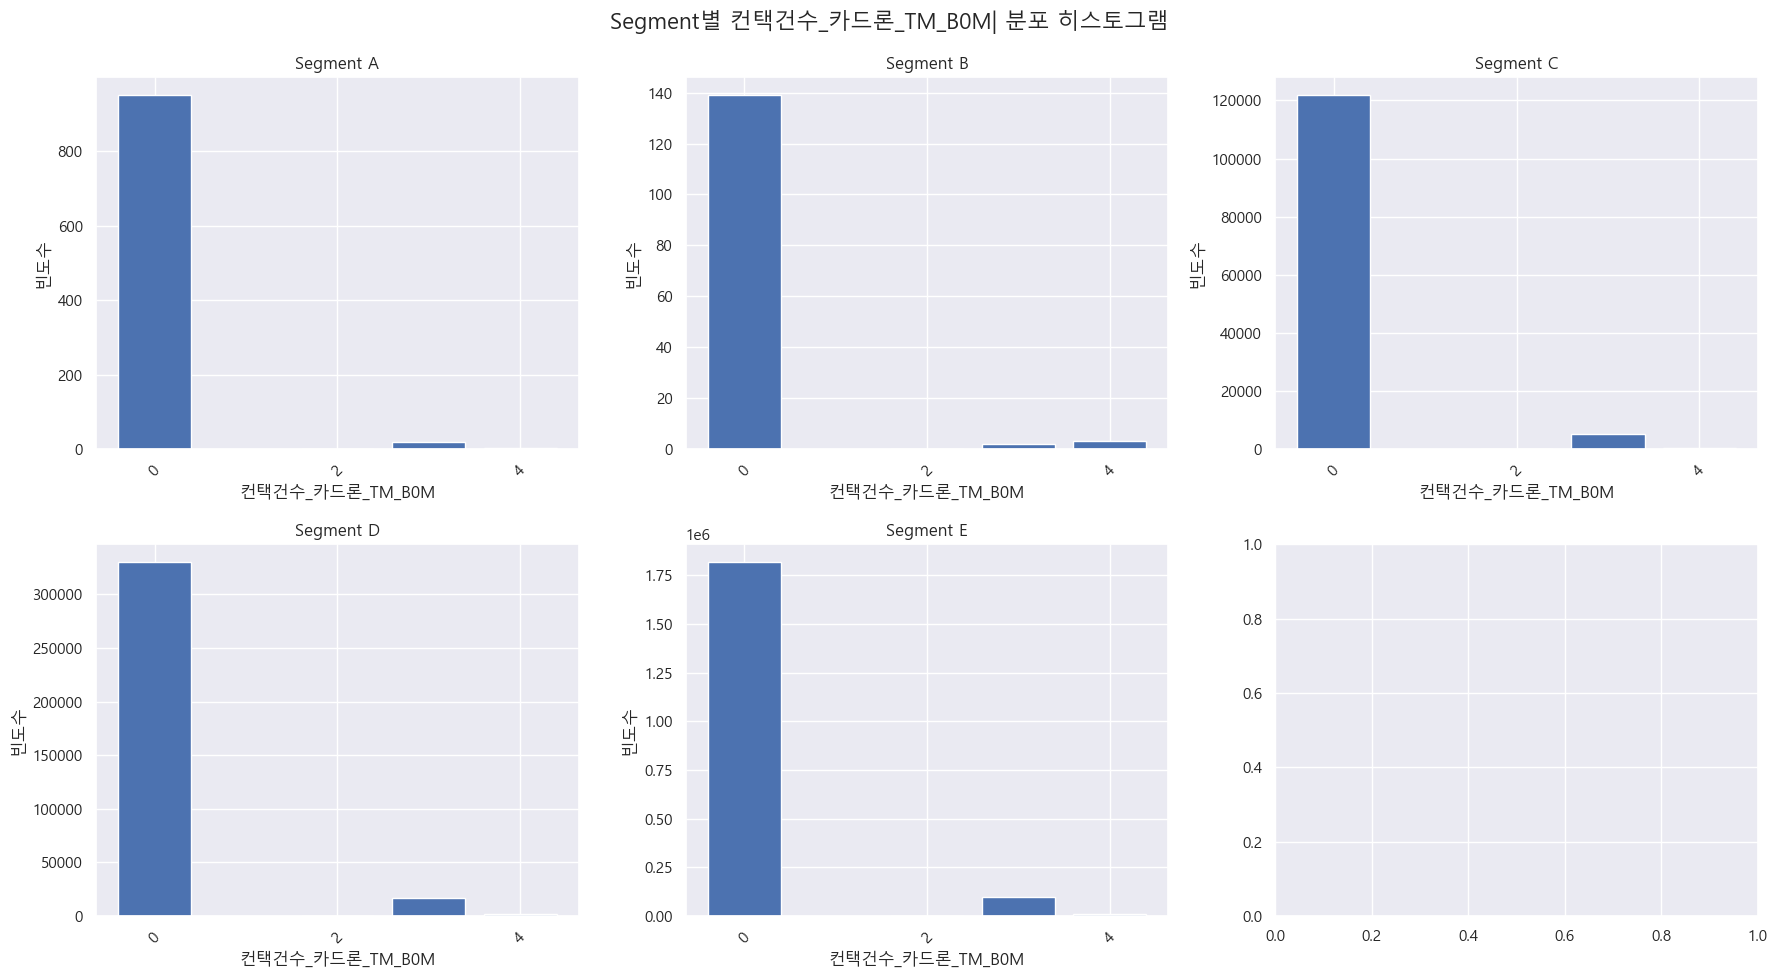

In [152]:
# 히스토그램 시각화 (Segment별 서브플롯)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
segments = tm_contact_dist.index.tolist()
axes = axes.flatten()

for i, seg in enumerate(segments):
    axes[i].bar(tm_contact_dist.columns, tm_contact_dist.loc[seg])
    axes[i].set_title(f"Segment {seg}")
    axes[i].set_xlabel("컨택건수_카드론_TM_B0M")
    axes[i].set_ylabel("빈도수")
    axes[i].set_xticks(range(0, max(tm_contact_dist.columns)+1, 2))
    axes[i].tick_params(axis='x', rotation=45)

# 전체 타이틀
fig.suptitle("Segment별 컨택건수_카드론_TM_B0M| 분포 히스토그램", fontsize=16)
plt.tight_layout()
plt.show()

In [154]:
# 1. Segment별 비율 테이블 (열 기준 normalize)
tm_contact_ratio = tm_contact_dist.div(tm_contact_dist.sum(axis=1), axis=0)
display(tm_contact_ratio)

컨택건수_카드론_TM_B0M,0,2,3,4
Segment,,,,
A,0.97840,0.00000,0.01955,0.00206
B,0.96528,0.00000,0.01389,0.02083
C,0.95477,0.00002,0.04097,0.00425
D,0.94544,0.00001,0.04930,0.00524
E,0.94569,0.00001,0.05025,0.00405


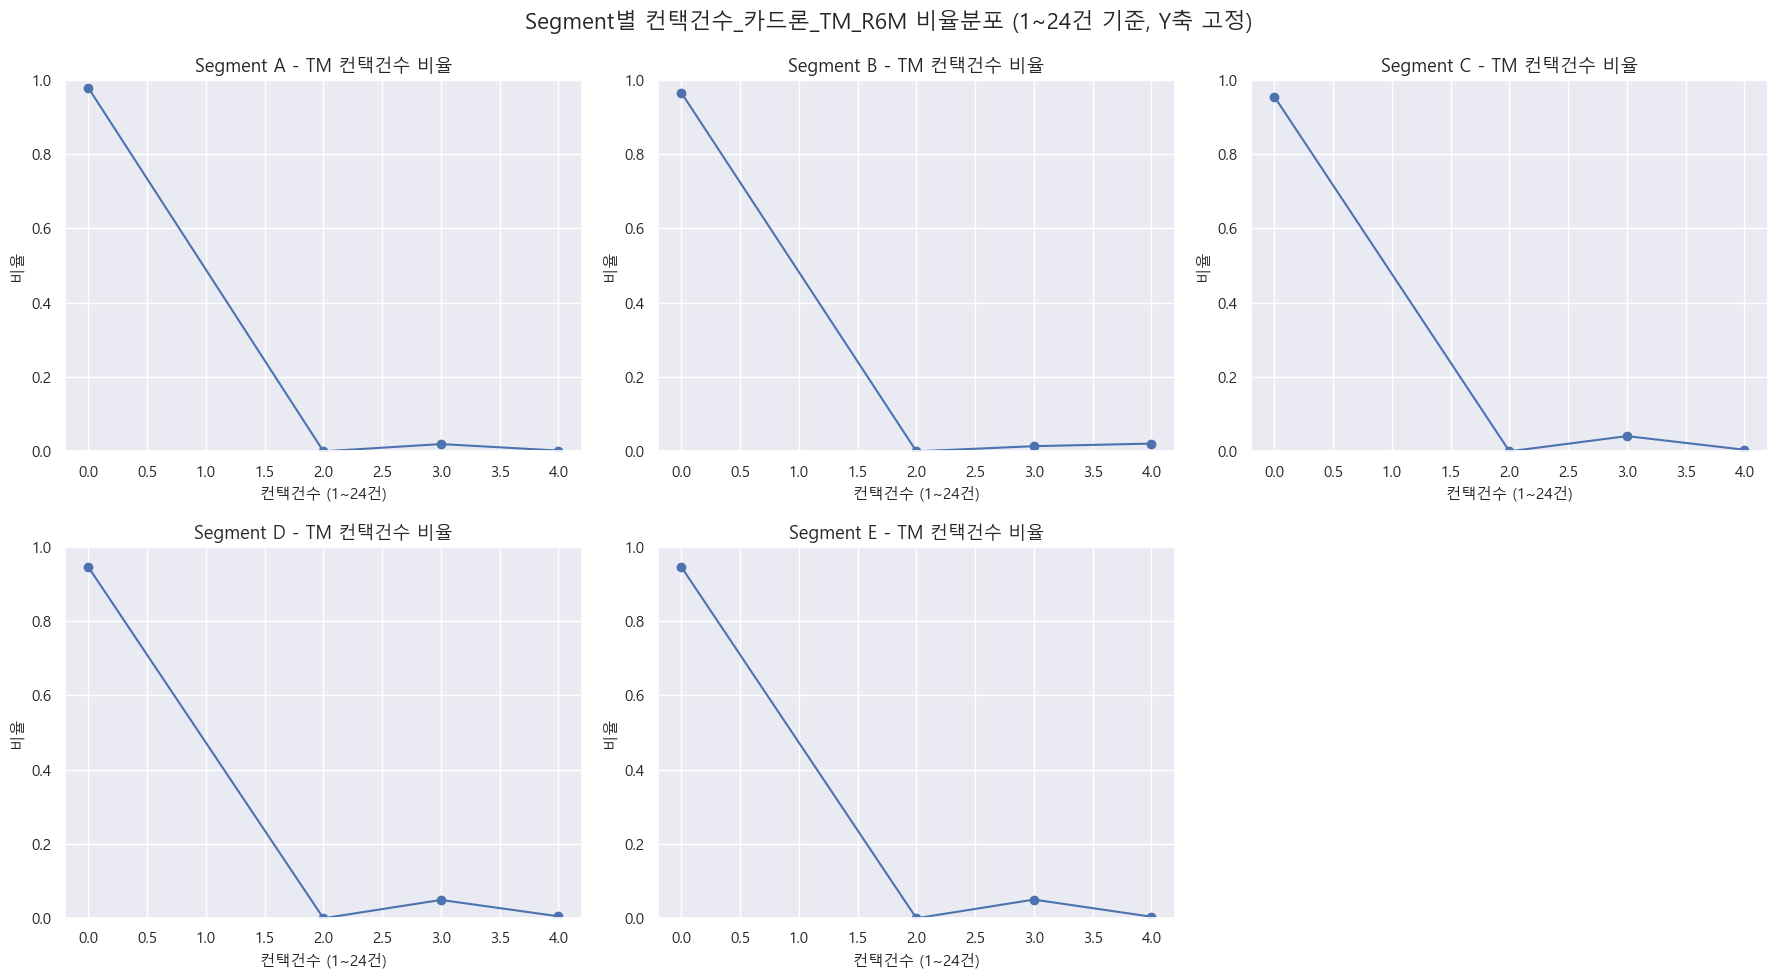

In [156]:
# 0건 제외한 1~24건 컬럼만 추출
tm_contact_ratio_range = tm_contact_ratio.loc[:, 0:6]

# 시각화
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

segments = tm_contact_ratio_range.index.tolist()

for i, seg in enumerate(segments):
    axes[i].plot(tm_contact_ratio_range.columns, tm_contact_ratio_range.loc[seg], marker='o')
    axes[i].set_title(f"Segment {seg} - TM 컨택건수 비율", fontsize=13)
    axes[i].set_xlabel("컨택건수 (1~24건)", fontsize=11)
    axes[i].set_ylabel("비율", fontsize=11)
    axes[i].set_ylim(0, 1)  # Y축 고정
    axes[i].grid(True)

# 빈 subplot 제거 (6번째)
fig.delaxes(axes[-1])

# 전체 타이틀
fig.suptitle("Segment별 컨택건수_카드론_TM_R6M 비율분포 (1~24건 기준, Y축 고정)", fontsize=16)
plt.tight_layout()
plt.show()

## 📊 카드론 채널별 컨택건수 (최근 6개월, R6M 기준) 분석 결과

### 🔍 주요 관찰 결과

1. **TM(텔레마케팅) 채널이 압도적**
   - 모든 세그먼트(A~E)에서 **`컨택건수_카드론_TM_R6M`** 수치가 다른 채널 대비 매우 높음
   - 특히 **E 세그먼트(1.87483)**, D(1.74812), C(1.50504)는 TM 채널 중심의 집중적 마케팅이 이루어진 것으로 보임
   - 이는 카드론 상품의 주요 홍보/유도 채널이 TM임을 의미

2. **세그먼트별 TM 활용도**
   - **Segment E >= D > C >= B > A** 순으로 TM 컨택건수 평균이 높음
   - 카드론 유도 타깃이 상대적으로 E와 D에 집중됨을 시사
   - 이들 그룹은 **카드론 수요가 높거나 리스크가 높은 집단**일 가능성 있음

3. **LMS, EM, 청구서 채널**
   - `컨택건수_카드론_LMS_R6M`, `EM_R6M`, `청구서_R6M`도 활용되나 전체적으로 수치가 낮음
   - **LMS_R6M**은 Segment D, E에서 상대적으로 높은 수치를 보임
     - D: 0.08688 / E: 0.09479 → LMS도 E 그룹 대상으로 보완 채널로 활용된 정황

4. **인터넷/앱 채널의 활용 부족**
   - `컨택건수_카드론_인터넷_R6M`, `당사앱_R6M`의 평균은 모든 세그먼트에서 거의 0에 가까움
   - 디지털 기반 채널이 카드론 마케팅에는 활용이 미흡하거나 비효율적일 수 있음

---

### 💡 인사이트 요약

- 카드론 마케팅은 **TM 채널 중심의 전략**이 뚜렷하며, **E, D 세그먼트 타깃 집중도**가 높음
- **LMS/청구서 채널**은 보조적인 역할로 사용됨
- **디지털 채널(앱, 인터넷)은 상대적으로 비중이 낮아**, 향후 이 채널의 개선 가능성 또는 전략 전환이 필요할 수 있음

### 🧭 전략 제안

- Segment E, D는 **카드론 주요 타깃**으로, TM 마케팅 외에도 LMS 및 다양한 채널 다각화를 고려할 필요 있음
- Segment A, B는 현재 컨택 비율이 낮으므로 **신규 시장 개척 타깃 또는 저관여층 관리 전략**으로 접근 가능
- TM 중심의 단일 채널 마케팅은 **장기적으로 고객 피로도나 거부반응**이 생길 수 있으므로 **채널 믹스 전략 도입 고려** 필요


### 컨택건수_포인트소진

In [158]:
# 분석할 컬럼 목록
point_tm_columns = [
    "컨택건수_포인트소진_TM_B0M",
    "컨택건수_포인트소진_TM_R6M"
]

# 데이터 타입 확인
df1[point_tm_columns].info()

# Segment A~E로 필터링
df1_seg = df1[df1["Segment"].isin(["A", "B", "C", "D", "E"])]

# Segment별 평균 계산 (전치하여 보기 좋게)
point_tm_mean = df1_seg.groupby("Segment")[point_tm_columns].mean().T

# 결과 출력
display(point_tm_mean)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400000 entries, 0 to 2399999
Data columns (total 2 columns):
 #   Column             Dtype
---  ------             -----
 0   컨택건수_포인트소진_TM_B0M  int64
 1   컨택건수_포인트소진_TM_R6M  int64
dtypes: int64(2)
memory usage: 36.6 MB


Segment,A,B,C,D,E
컨택건수_포인트소진_TM_B0M,0.00000,0.00000,0.00000,0.00000,0.00000
컨택건수_포인트소진_TM_R6M,0.00000,0.02083,0.01151,0.01176,0.00522


In [160]:
df1['컨택건수_포인트소진_TM_R6M'].value_counts().sort_index()

컨택건수_포인트소진_TM_R6M
0    2384381
1      15618
2          1
Name: count, dtype: int64

In [162]:
# 세그먼트별 '컨택건수_카드론_TM_R6M' 값 분포 확인
tm_contact_dist = (
    df1.groupby("Segment")["컨택건수_포인트소진_TM_R6M"]
    .value_counts()
    .sort_index()  # 값 기준 정렬
    .unstack(fill_value=0)  # 보기 좋게 pivot
)

# 결과 출력
display(tm_contact_dist)

컨택건수_포인트소진_TM_R6M,0,1,2
Segment,,,
A,972,0,0
B,141,3,0
C,126122,1468,0
D,345134,4108,0
E,1912012,10039,1


In [172]:
# 1. Segment별 비율 테이블 (열 기준 normalize)
tm_contact_ratio = tm_contact_dist.div(tm_contact_dist.sum(axis=1), axis=0)
display(tm_contact_ratio)

컨택건수_포인트소진_TM_R6M,0,1,2
Segment,,,
A,1.00000,0.00000,0.00000
B,0.97917,0.02083,0.00000
C,0.98849,0.01151,0.00000
D,0.98824,0.01176,0.00000
E,0.99478,0.00522,0.00000


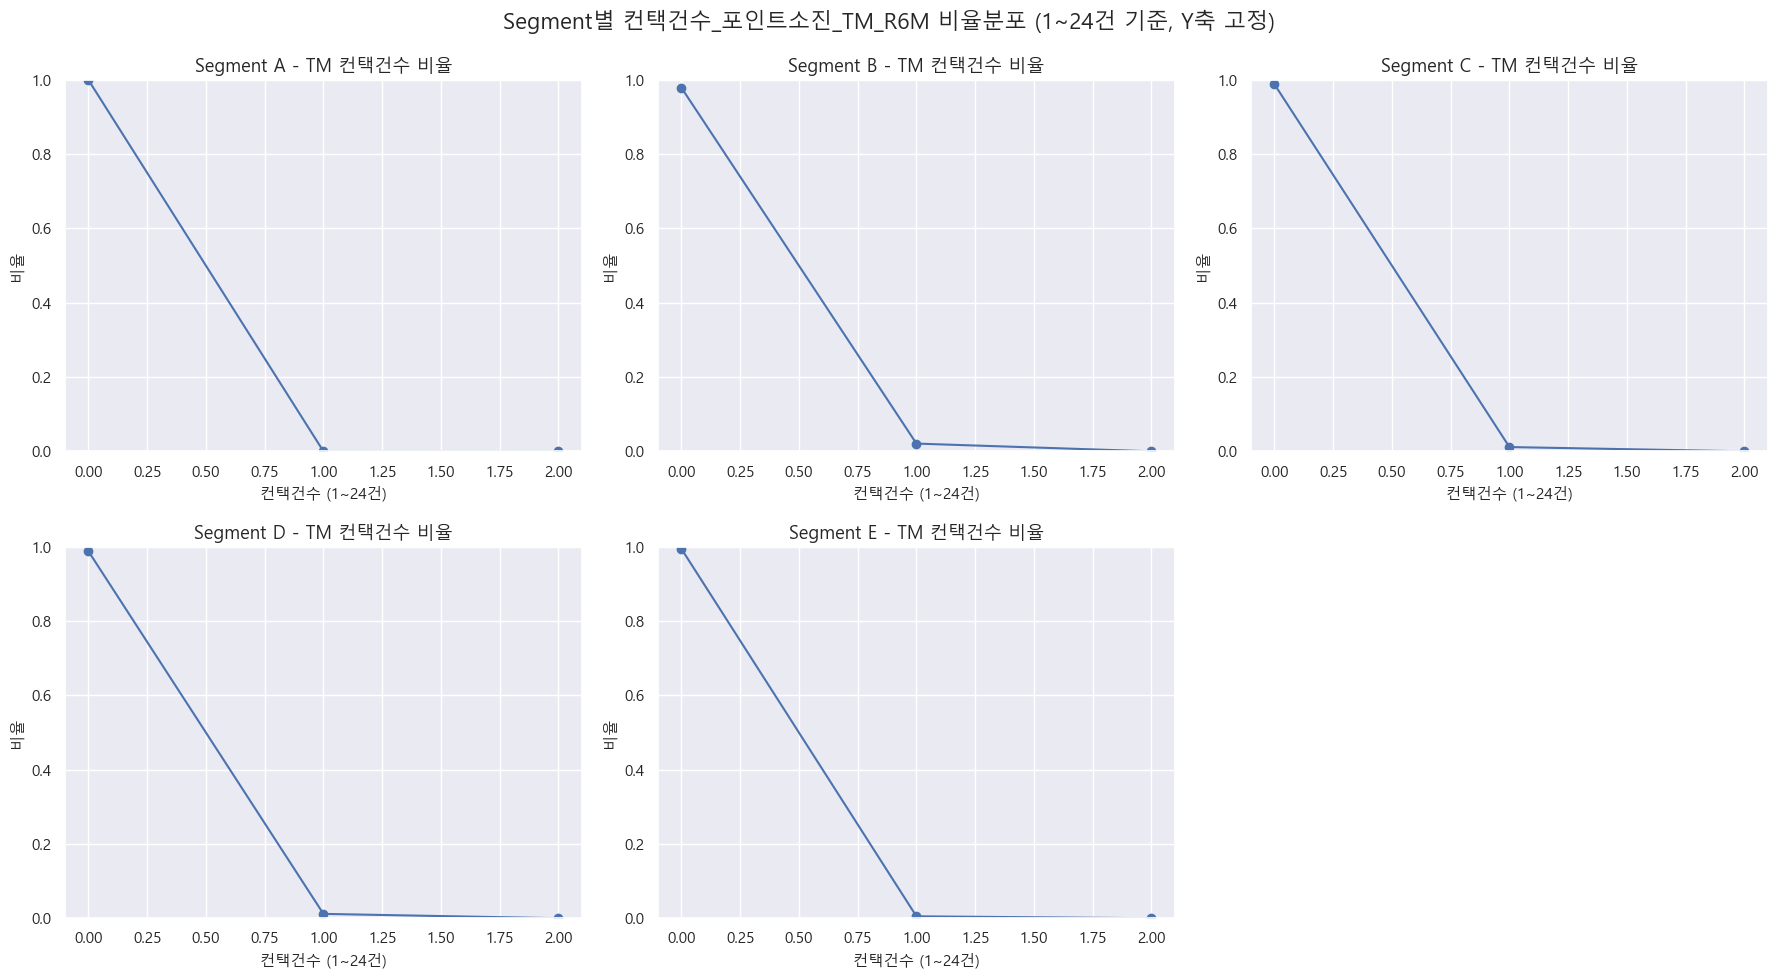

In [170]:
# 0건 제외한 1~24건 컬럼만 추출
tm_contact_ratio_range = tm_contact_ratio.loc[:, 0:6]

# 시각화
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

segments = tm_contact_ratio_range.index.tolist()

for i, seg in enumerate(segments):
    axes[i].plot(tm_contact_ratio_range.columns, tm_contact_ratio_range.loc[seg], marker='o')
    axes[i].set_title(f"Segment {seg} - TM 컨택건수 비율", fontsize=13)
    axes[i].set_xlabel("컨택건수 (1~24건)", fontsize=11)
    axes[i].set_ylabel("비율", fontsize=11)
    axes[i].set_ylim(0, 1)  # Y축 고정
    axes[i].grid(True)

# 빈 subplot 제거 (6번째)
fig.delaxes(axes[-1])

# 전체 타이틀
fig.suptitle("Segment별 컨택건수_포인트소진_TM_R6M 비율분포 (1~24건 기준, Y축 고정)", fontsize=16)
plt.tight_layout()
plt.show()